In [3]:
import os
import numpy as np
from os.path import abspath, exists
from scipy import sparse
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt

In [4]:
def output_file(a, idx2name, c_idx):
    dirpath = os.getcwd()
    node_file = dirpath + '//nodes.csv'
    edge_file = dirpath + '//edges.csv'

    with open(edge_file, 'w') as fid:
        fid.write('Source\tTarget\n')
        for i in range(len(a)):
            fid.write(f'{a[i,0]}\t{a[i,1]}\n')

    with open(node_file, 'w') as fid:
        fid.write('Id\tLabel\tColor\n')
        for i in range(len(idx2name)):
            fid.write(f'{i}\t{idx2name[i]}\t{c_idx[i]}\n')


In [5]:
def read_team_name():
    # read inverse_teams.txt file
    f_path = abspath("inverse_teams.txt")
    idx2name = []
    if exists(f_path):
        with open(f_path) as fid:
            for line in fid.readlines():
                name = line.split("\t", 1)[1]
                idx2name.append(name[:-1])
    return idx2name

In [6]:
def import_graph():
    # read the graph from 'play_graph.txt'
    f_path = abspath("play_graph.txt")
    if exists(f_path):
        with open(f_path) as graph_file:
            lines = [line.split() for line in graph_file]
    return np.array(lines).astype(int)

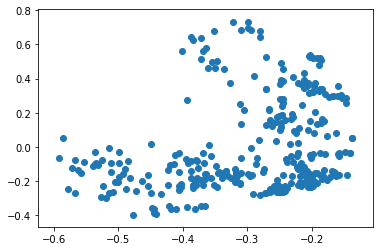

[ 9  2  9  0  0  0  8  4  5  4  2  9  3  3  0  0  5  4 12  4  5  7  5  5
  8  3  5  5  7  8  2  6  7  2  6  0  8  8  7  2  4 10  2  0  8  8  2  6
  4  6  2  6  4  0  6  4  3  4  8  4  4  0  6  6 10  4  6  6  4  4  6  4
  3  4  4  4  3 11  2  4  4  0  0  0  0  4  8  0  2 10  2  4  2  4  5  4
  0  0 12  3 11  4  9  6  2  6  4  4  6  4  0  4 12  0  2  0  0  4  3  4
  0  4  3  4 10  0  2  6  2  6  3  4  0  0  2  6  1  1  1  1 12 12  0  0
  3  4  5 11  5  5  5  4 12  4 11  3  3  3  4  4  7  3 12  3  7  3  3 11
  5 10  1  0  8  4  7  5  0 10  2  0  2  9 12  0  5  4  2  6  8  8  1  0
 12  0 12  1  5  5  7  7  7  7  9 10  3  4  9 10  6  6  0  0  1 10  6 10
 10  1  9  4 10  7  9 12  4  0  4  2  2  6  6  6  1 12  1  1  6  0 10 10
  4  0  9  5  4  9 11  3  3  7  1  0  2  5  0 12  2  5  7 11  1  7  7  5
  7  1  7  5  0  3 10  2  7  9  9  2  7  7  2  2  2  1  8  4 12  1 12  1
  2 12  3  3  2  9  9  5  9 11  2 11 11 11 11 11  7  7  8 11  5 12 12 11
  2  9  5  9  3  3  7  8  5]
Cluster 1
************

In [101]:
def main():
    # spectral clustering
    n = 321
    k = 13

    # load the graph
    a = import_graph()

    i = a[:, 0]-1
    j = a[:, 1]-1
    v = np.ones((a.shape[0], 1)).flatten()

    #https://www.simplycs.in/2018/08/10/7-what-is-sparse-matrix-how-it-is-represented-what-is-the-need-of-sparse-matrix/
    #we are using sparse matrix as ijv. v is the edge.
    #for numpy, we can treat the ijv matrix as regular matrix. Transpose, add..everything the same. 
    #here, the shape of the matrix is (321 X 321)
    A = sparse.coo_matrix((v, (i, j)), shape=(n, n))
    
    #we want to find the undirected graph. if team a played b and later team b played a, that should be on edge
    #hence divide by 2
    A = (A + np.transpose(A))/2

    #https://people.orie.cornell.edu/dpw/orie6334/Fall2016/lecture7.pdf
    #https://pdfs.semanticscholar.org/ed02/53074f0df58a88dd41becaca98600a8bda00.pdf
    #The normalized adjacency matrix
    #The  normalized  adjacency  matrix is defined only for graphs without isolated vertices.
    # L = D @ A @ D  <--- will create normalized adjacency matrix
    # this is one of the variants of spectral clustering. Check professor's slides.
    D = np.diag(1/np.sqrt(np.sum(A, axis=1)).A1)
    L = D @ A @ D

    v, x = np.linalg.eig(L)
    x = x[:, 0:k].real
    
    #why are we doing this?
    #we are normalizing it
    #http://mathworld.wolfram.com/NormalizedVector.html
    x = x/np.repeat(np.sqrt(np.sum(x*x, axis=1).reshape(-1, 1)), k, axis=1)

    # scatter
    plt.scatter(x[:, 0], x[:, 1])
    plt.show()

    # k-means
    kmeans = KMeans(n_clusters=k).fit(x)
    c_idx = kmeans.labels_

    # show cluster
    idx2name = read_team_name()
    #print(c_idx)
    for i in range(13):
        print(f'Cluster {i+1}\n***************')
        idx = [index for index, t in enumerate(c_idx) if t == i]
        for index in idx:
            print(idx2name[index])
        print('\n')

    # output file
    output_file(a, idx2name, c_idx)


if __name__ == '__main__':
    main()


In [114]:
# Hadi: the below cells are same as the cell above except that I am analyzing different lines of it.

# spectral clustering
n = 321
k = 13

# load the graph
a = import_graph()

print(a)
print(a[:, 0]-1)

[[  1   2]
 [  3   4]
 [  5   6]
 ...
 [221 178]
 [ 90 170]
 [ 82 245]]
[  0   2   4 ... 220  89  81]


In [115]:
i = a[:, 0]-1
j = a[:, 1]-1
v = np.ones((a.shape[0], 1)).flatten()

v

array([1., 1., 1., ..., 1., 1., 1.])

In [116]:
A = sparse.coo_matrix((v, (i, j)), shape=(n, n))
print(np.shape((A)))
print(np.shape(np.transpose(A)))
A = (A + np.transpose(A))/2
#print(A)


(321, 321)
(321, 321)


In [105]:
np.shape(1/np.sqrt(np.sum(A, axis=1)))
np.shape(1/np.sqrt(np.sum(A, axis=1)).A1)
np.sum(A, axis=1)
#np.sqrt(np.sum(A, axis=1))
np.shape(np.diag(1/np.sqrt(np.sum(A, axis=1)).A1))

(321, 321)

In [106]:
D = np.diag(1/np.sqrt(np.sum(A, axis=1)).A1)

In [107]:
L = D @ A @ D

v, x = np.linalg.eig(L)
x = x[:, 0:k].real


np.shape(x)

(321, 13)

In [110]:
np.argmax(v)

0

In [113]:
np.sqrt(np.sum(x*x, axis=1)).reshape(-1, 1)

v.argsort()


array([ 24,  26,  36,  37,  38,  39,  40,  41,  42,  43,  44,  45,  46,
        47,  59,  60,  61,  62,  63,  64,  65,  66,  67,  69,  68,  70,
        71,  72,  73,  74,  75,  76,  87,  88,  89,  90,  91,  92,  94,
        95,  97,  96,  93, 114, 113, 116, 117, 128, 127, 126, 125, 124,
       133, 134, 135, 136, 137, 138, 148, 149, 150, 151, 152, 153, 154,
       155, 156, 157, 160, 159, 164, 166, 165, 173, 174, 175, 176, 178,
       177, 187, 189, 188, 190, 192, 191, 193, 194, 195, 196, 198, 199,
       197, 201, 207, 206, 205, 204, 215, 216, 220, 219, 218, 217, 232,
       233, 237, 236, 234, 235, 238, 241, 242, 243, 240, 239, 245, 294,
       248, 249, 262, 251, 250, 252, 253, 254, 255, 296, 272, 297, 273,
       303, 281, 283, 284, 285, 287, 304, 289, 290, 309, 292, 291, 293,
       298, 288, 310, 308, 307, 286, 306, 305, 282, 274, 268, 267, 266,
       264, 265, 269, 276, 278, 280, 279, 302, 277, 295, 275, 301, 312,
       319, 318, 320, 313, 316, 317, 315, 314, 311, 300, 299, 27

In [ ]:
x = x/np.repeat(np.sqrt(np.sum(x*x, axis=1).reshape(-1, 1)), k, axis=1)


In [ ]:

# scatter
plt.scatter(x[:, 0], x[:, 1])
plt.show()

# k-means
kmeans = KMeans(n_clusters=k).fit(x)
c_idx = kmeans.labels_

# show cluster
idx2name = read_team_name()
for i in range(13):
    print(f'Cluster {i+1}\n***************')
    idx = [index for index, t in enumerate(c_idx) if t == i]
    for index in idx:
        print(idx2name[index])
    print('\n')

# output file
output_file(a, idx2name, c_idx)